In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# 데이터 전처리와 스케일 조정
### 비지도 학습은 EDA 에서 많이 사용된다.

### StandardScaler가 일반적이긴 하지만 이상치에 영향을 많이 받으므로 이상치가 존재하다면 RobustScaler가 더 바람직하다.
### RobustScaler 는 평균과 분산 대신 중간값과 사분위 값을 사용한다.

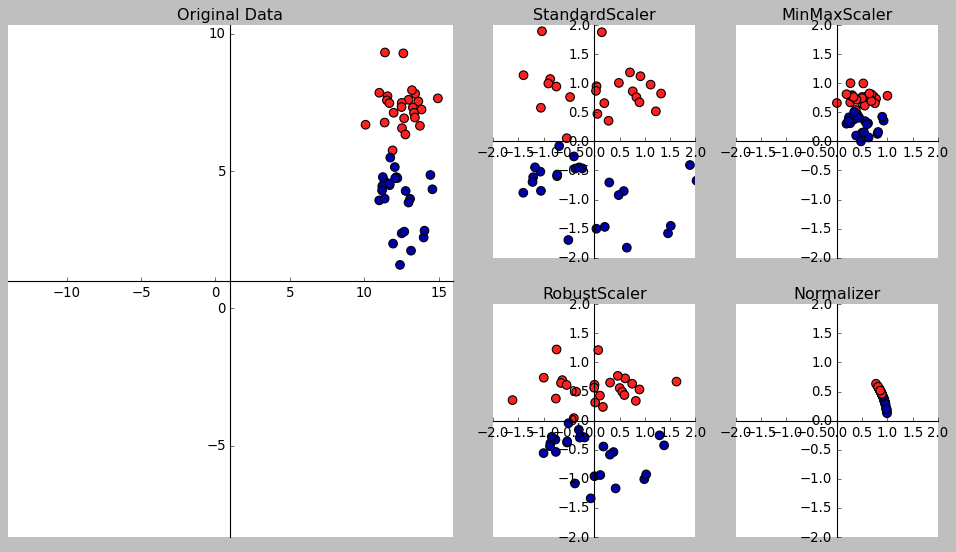

In [8]:
### 신경망이나 SVM은 경사하강법을 사용하기 때문에 스케일에 민감하다.
mglearn.plots.plot_scaling()

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


## MinMaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)

print("변호나 후 크기 : ", X_train_scaled.shape)
print("스케일 조정 전 특성별 최솟값 :\n", X_train.min(axis = 0))
print("스케일 조정 전 특성별 최댓값 :\n", X_train.max(axis = 0))

print("스케일 조정 후 특성별 최솟값 :\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값 :\n", X_train_scaled.max(axis=0))

변호나 후 크기 :  (426, 30)
스케일 조정 전 특성별 최솟값 :
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값 :
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값 :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값 :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# QuantileTransformer
### 이상치에 민감하지 않으며 0,1 사이의 값으로 압축한다.

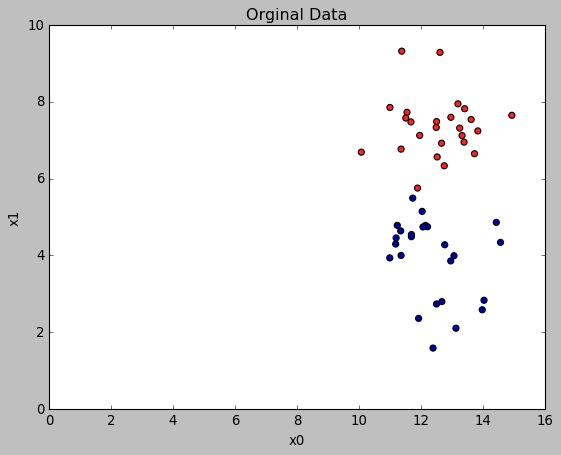

In [12]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black',cmap=mglearn.cm2)
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Orginal Data")
plt.show()

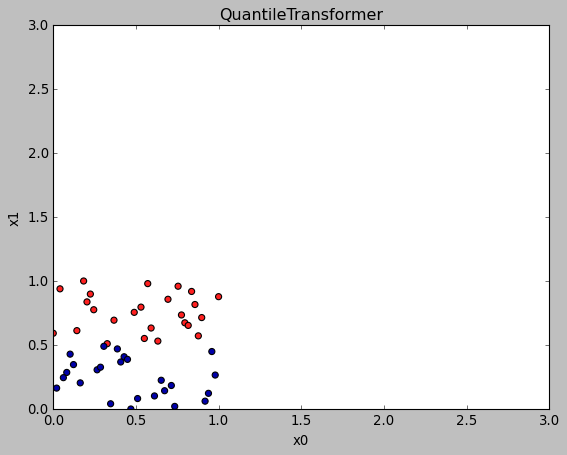

In [13]:
from sklearn.preprocessing import QuantileTransformer
# n_quantiles 만큼 분위를 만들고 해당 분위들에 데이터를 균등하게 분포시킨다.
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black',cmap=mglearn.cm2)
plt.xlim(0,3)
plt.xlabel('x0')
plt.ylim(0,3)
plt.ylabel("x1")
plt.title(scaler.__class__.__name__)
plt.show()

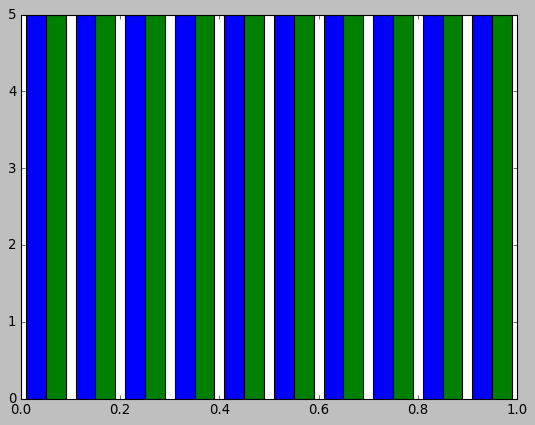

In [14]:
# 분위에 일정한 갯수의 데이터가 분포하고 있다.
plt.hist(X_trans)
plt.show()

In [15]:
X_trans = QuantileTransformer(n_quantiles=5).fit_transform(X)
print(np.percentile(X_trans[:,0].reshape(-1,1), [0,25,50,75,100]))

[0.         0.25040589 0.50014305 0.74726633 1.        ]


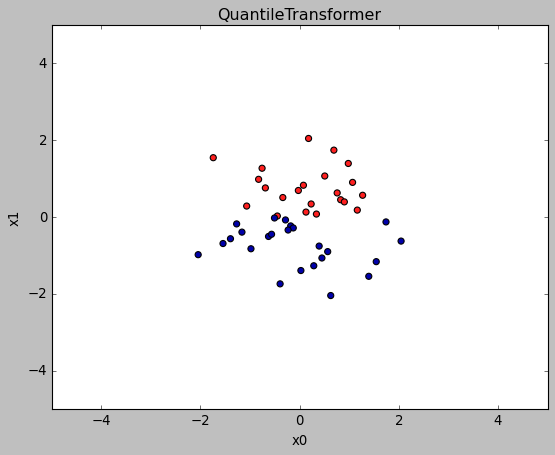

In [16]:
# oupput_distribution = 'normal' 로 지정하면 균등분포에서 정규분포로 바꿀 수 있다.
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black', cmap=mglearn.cm2)
plt.xlim(-5,5)
plt.xlabel("x0")
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(scaler.__class__.__name__)
plt.show()

# PowerTransformer
### 데이터 특성별로 정규분포에 가깝게 변환시켜준다.
### method = "yeo-johnson", "box-cox" (default = "yeo-johnson")

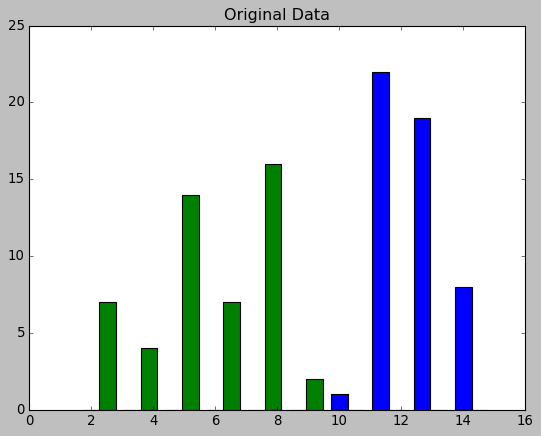

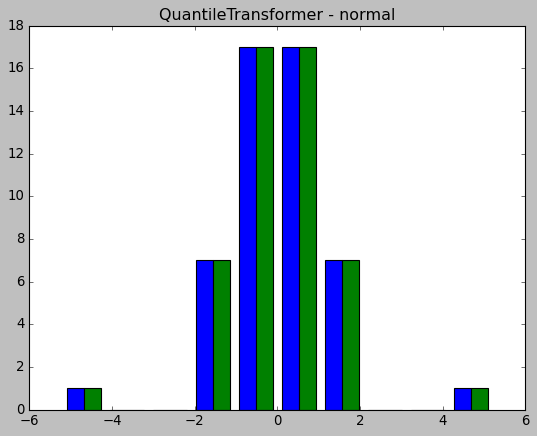

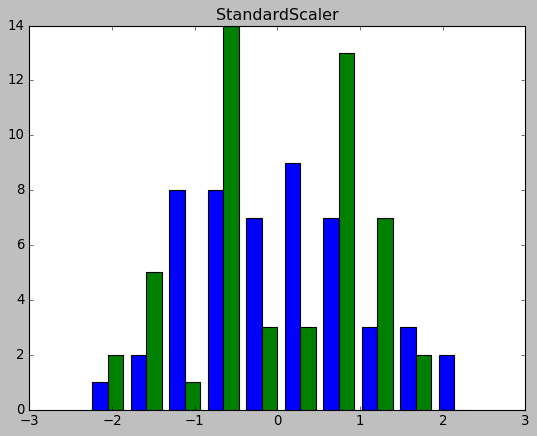

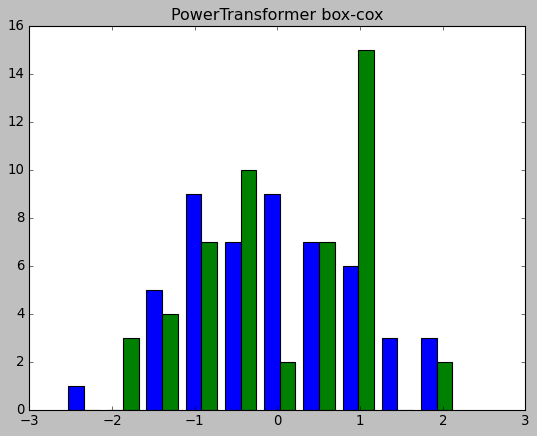

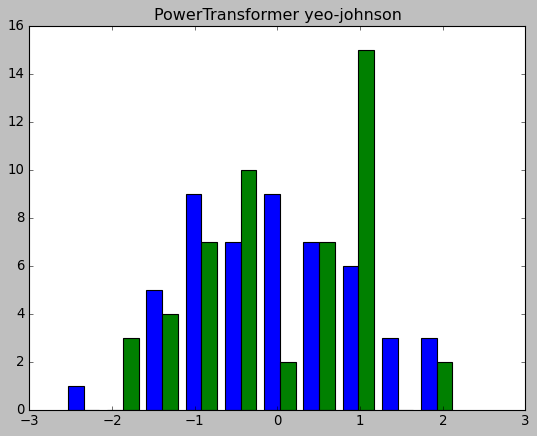

In [17]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

plt.hist(X)
plt.title("Original Data")
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer - normal")
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title("StandardScaler")
plt.show()

# box-cox는 데이터가 모두 양수인 경우에만 사용할 수 있다.
X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer box-cox")
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer yeo-johnson")
plt.show()

# 훈련 데이터와 테스트 데이터의 스케일링

### train set과 test set을 나눈 다음 각각 scaling을 하는 것은 미친짓이다.
## 위와 별개로 실수할 수 있는 오류
### 데이터를 한번에 scaling 한 다음 train, test set으로 split 할 수 있다. 하지만 이는 바람직하지 못하다. 

![image](images/split_scaling.PNG)

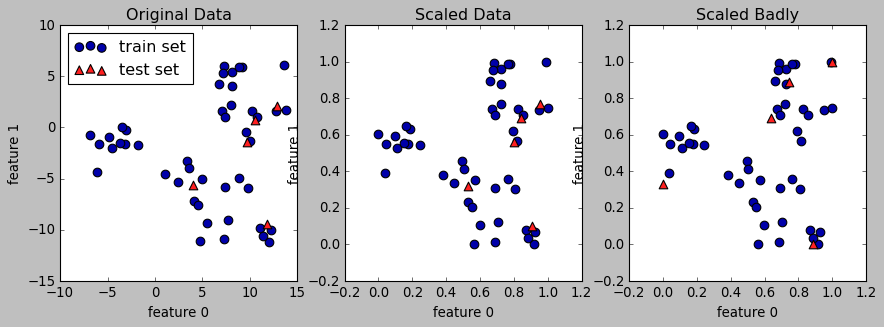

In [27]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1],
                c=mglearn.cm2.colors[0], label='train set', s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker = '^', 
                c=mglearn.cm2.colors[1], label='test set', s=60)
axes[0].legend(loc='best')
axes[0].set_title("Original Data")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], 
                c=mglearn.cm2.colors[0], label='train set', s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1],
                c=mglearn.cm2.colors[1], label='test set', marker='^', s=60)
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c=mglearn.cm2.colors[0], label='train set', s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], 
                marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[2].set_title("Scaled Badly")

for ax in axes :
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

# 지도학습에서 데이터 전처리 효과

In [31]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
# scaling 하지 않는 데이터의 성과
print(f"test score : {svm.score(X_test, y_test):0.4f}")


test score : 0.6294


In [34]:
# MinMaxScaler scaling 한 데이터의 성과
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f"test_scaled score : {svm.score(X_test_scaled, y_test):0.4f}")

test_scaled score : 0.9510


In [35]:
# StandardSaler scaling 한 데이터의 성과
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f"test_scaled score : {svm.score(X_test_scaled, y_test):0.4f}")

test_scaled score : 0.9650
